In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np

%matplotlib inline

In [8]:
df = pd.read_csv('../data/russell.csv', header=None)
df_liquidity = pd.read_csv('../data/RussellLiquidity.csv', header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Columns: 5035 entries, 0 to 5034
dtypes: float64(5035)
memory usage: 105.2 MB


In [5]:
apple = df.loc[49,:]

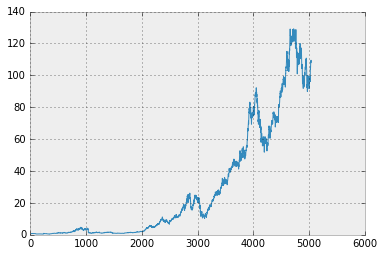

In [6]:
plt.plot(apple)

In [7]:
df.shape[0] * df.shape[1]

13790865

In [22]:
# august 16, 1996
# august 16, 2016

In [12]:
df_liquidity.describe()

//anaconda/envs/quant/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0,1,2,3,4,5,6,7,8,9,...,5025,5026,5027,5028,5029,5030,5031,5032,5033,5034
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,...,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,74.980951,74.270124,73.090904,74.012337,73.674850,73.609991,72.853800,73.254497,73.323523,73.180354,...,60.725487,61.261985,61.224158,61.223521,61.056405,61.328131,61.258647,61.578687,61.133578,61.108166
std,2186.450292,2157.236429,2108.493623,2147.475065,2127.962883,2127.347602,2098.133396,2107.916459,2107.920947,2107.910155,...,95.644914,96.683590,96.491245,96.593391,96.472895,96.733070,96.483892,96.617321,96.165903,96.090523
min,0.005085,0.005148,0.005190,0.005138,0.005211,0.005243,0.005295,0.005295,0.005327,0.005243,...,0.000800,0.000500,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,90660.000000,89446.000000,87422.000000,89041.000000,88231.000000,88231.000000,87017.000000,87422.000000,87422.000000,87422.000000,...,1688.300000,1710.000000,1705.000000,1705.000000,1702.000000,1709.300000,1698.900000,1704.900000,1700.000000,1678.000000


In [46]:
momentum = ((df.shift(-250) - df) / df)
momentum_apple = momentum.loc[49, :]

In [35]:
def plot_fft(x):
    f = np.fft.fftfreq(x.shape[0])
    P = np.absolute( np.fft.fft(x) ) ** 2
    
    plt.semilogy(f, P)
    plt.show()

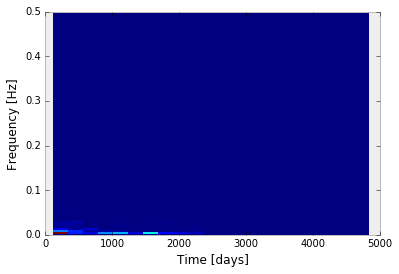

In [44]:
f, t, Sxx = spectrogram(momentum_apple, 1.0)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [days]')
plt.show()

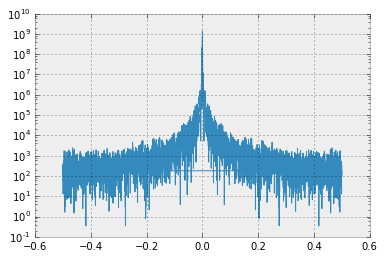

In [45]:
plot_fft(momentum_apple)

In [59]:
x = pd.concat( [momentum.loc[:, 0].to_frame(), df.loc[:, 249].to_frame(), df.loc[:, 250].to_frame()] )
x

,0,249,250
0,-0.573360,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,0.550431,NaN,NaN
6,1.660084,NaN,NaN
7,NaN,NaN,NaN
8,-0.748119,NaN,NaN
9,-0.374783,NaN,NaN


In [51]:
df.nlargest?